In [1]:
import torch
import torch.nn as nn
import numpy as np

In [3]:
from datasets.road_dataset import load_data

In [2]:
from datasets.classification_dataset import load_data as load_data_classification

In [7]:
import os
os.getcwd()

'c:\\Users\\ricej\\Documents\\UT Austin\\Deep Learning\\dl-hw\\homework3\\homework'

In [8]:
os.path.exists("..\\drive_data\\cornfield_crossing_00")

False

In [46]:
os.listdir("..\\drive_data\\train")

['cornfield_crossing_00',
 'cornfield_crossing_01',
 'cornfield_crossing_02',
 'cornfield_crossing_03',
 'hacienda_00',
 'hacienda_01',
 'hacienda_02',
 'hacienda_03',
 'lighthouse_00',
 'lighthouse_01',
 'lighthouse_02',
 'lighthouse_03',
 'snowmountain_00',
 'snowmountain_01',
 'snowmountain_02',
 'snowmountain_03']

In [153]:
data = load_data("..\\drive_data\\train")

Loaded 8000 samples from 16 episodes


In [3]:
data_classification = load_data_classification("..\\classification_data\\train")

In [8]:
for img, label in data_classification:
    break

In [11]:
label.shape

torch.Size([128])

In [15]:
import matplotlib.pyplot as plt

In [142]:
from matplotlib.backends.backend_pdf import PdfPages

In [157]:
for d in data:
    break

In [44]:
def loss_formula(segm, dpth):
    return abs(3*(segm)*(dpth)/(2*segm)+(dpth))

In [48]:
loss_formula(.9, .3)

0.75

In [160]:
with PdfPages("eda.pdf") as pdf:
    for batch in data:
        for j in range(batch["image"].shape[0]):
            if np.random.rand() < 0.01:
                fig, ax = plt.subplots(1, 2, figsize=(20, 10))
                ax[0].imshow(batch["image"][j].numpy().transpose(1, 2, 0))
                ax[1].imshow(batch["depth"][j].numpy(), vmin=0, vmax=1, cmap="jet")
                for i in range(2):
                    ax[i].imshow(batch["track"][j].numpy()>0, alpha=0.3, cmap="gray_r")
                    ax[i].set_rasterized(True)
                pdf.savefig(fig)
                plt.close(fig)

In [171]:
l_boundary_hold = np.zeros((96,128))
r_boundary_hold = np.zeros((96,128))
depth_hold = np.zeros((96,128))

all_depths = np.zeros((8000, 96, 128))

In [173]:
import tqdm

In [174]:
i=0
for batch in tqdm.tqdm(data):
    for img in batch["track"]:        
        l_boundary_hold += img.numpy() == 1
        r_boundary_hold += img.numpy() == 2
    for depth in batch["depth"]:
        depth_hold += depth.numpy()
        all_depths[i] = depth.numpy()
        i+=1

100%|██████████| 250/250 [00:09<00:00, 26.92it/s]


In [135]:
# import lognorm for coloring in matplotlib
from matplotlib.colors import LogNorm

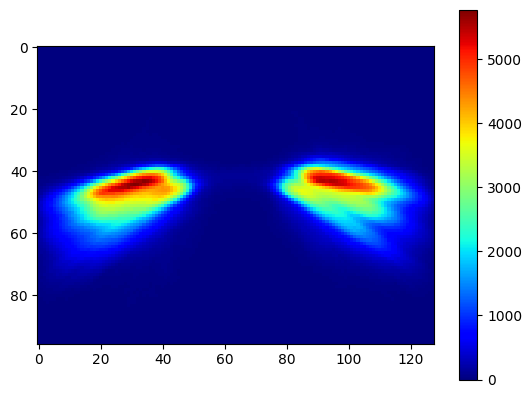

In [175]:
plt.imshow(l_boundary_hold+r_boundary_hold, cmap="jet")
plt.colorbar()

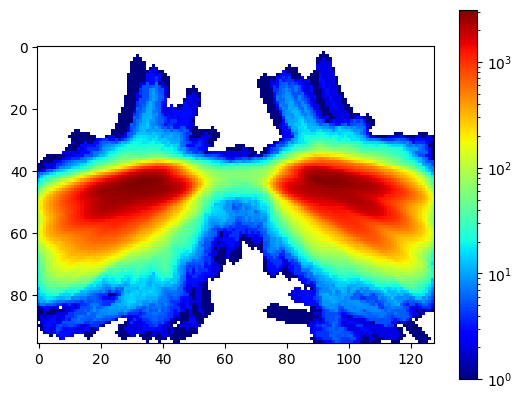

In [164]:
plt.imshow(l_boundary_hold+r_boundary_hold, cmap="jet", norm=LogNorm())
plt.colorbar()

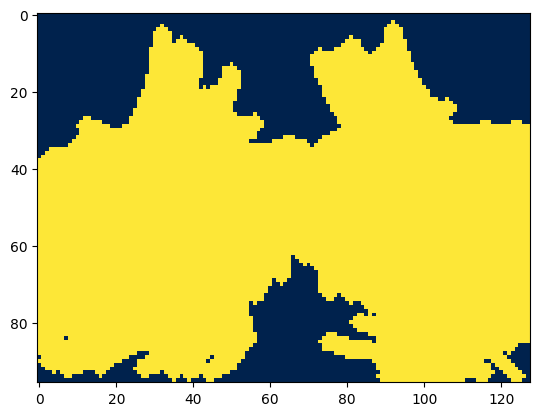

In [165]:
plt.imshow((l_boundary_hold+r_boundary_hold)>0, cmap="cividis")

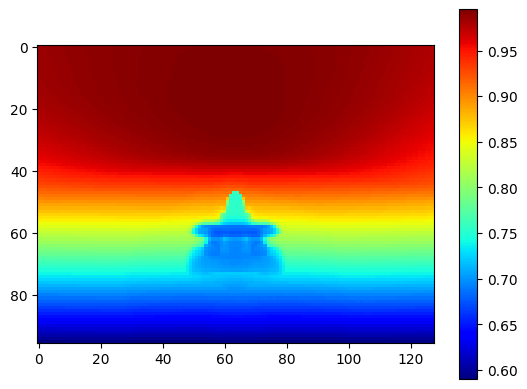

In [166]:
plt.imshow(depth_hold/8000, cmap="jet")
plt.colorbar()

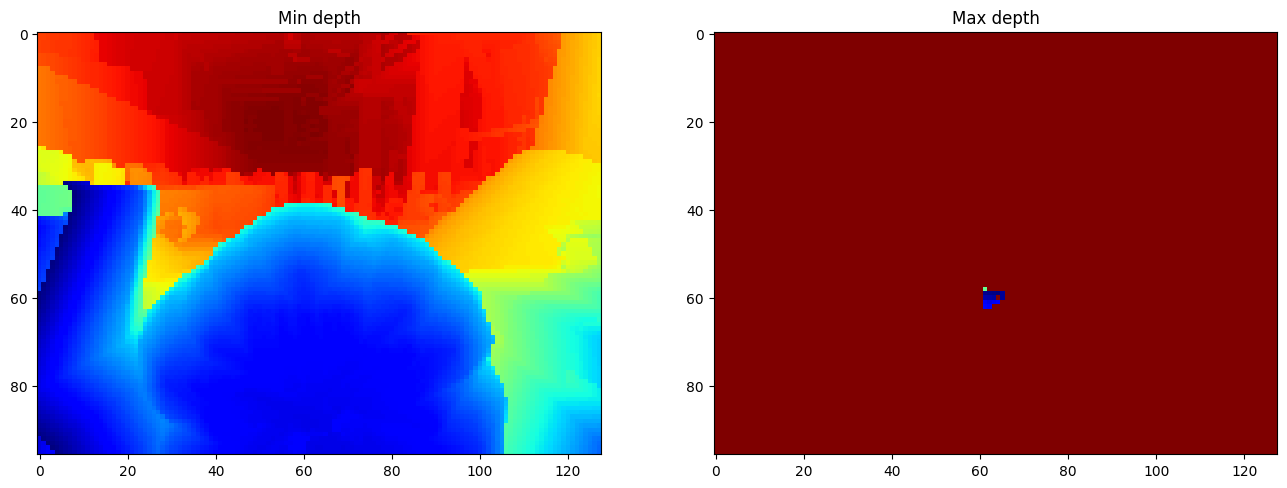

In [177]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
ax[0].imshow(np.min(all_depths, axis=0), cmap="jet")
ax[1].imshow(np.max(all_depths, axis=0), cmap="jet")
ax[0].set_title("Min depth")
ax[1].set_title("Max depth")
plt.show()

In [178]:
import datetime

In [180]:
datetime.now()

AttributeError: module 'datetime' has no attribute 'now'